In [ ]:
import csv
import pandas as pd
import numpy as np
import statistics
import time

import matplotlib.pyplot as plt
from matplotlib import interactive
import matplotlib as mpl
%matplotlib inline
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.decomposition import PCA

import random

# Naive predictors

In [ ]:
# Predict by rankings
matches_data = pd.read_csv('datasets\manipulated_datasets\matches_data_1991-2018.csv')
matches_data = matches_data.dropna(subset=['winner_rank', 'loser_rank'])

num_of_matches = matches_data.shape[0]
matches_data['prediction_outcome'] = np.where(matches_data['winner_rank'] < matches_data['loser_rank'], 1, 0)
num_of_matches_succeeded_to_predict = matches_data['prediction_outcome'].sum()


print('Num of matches: ', num_of_matches)
print('Num of matches predicted successfuly: ', num_of_matches_succeeded_to_predict)
print('Predicting rate: ', num_of_matches_succeeded_to_predict/num_of_matches)


Num of matches:  88862
Num of matches predicted successfuly:  58196
Predicting rate:  0.6549031081902276


In [ ]:
# Predict by height
matches_data = pd.read_csv('datasets\manipulated_datasets\matches_data_1991-2018.csv')
matches_data = matches_data.dropna(subset=['winner_height', 'loser_height'])

num_of_matches = matches_data.shape[0]
matches_data['prediction_outcome'] = np.where(matches_data['winner_height'] > matches_data['loser_height'], 1, 0)
num_of_matches_succeeded_to_predict = matches_data['prediction_outcome'].sum()

print('Num of matches: ', num_of_matches)
print('Num of matches predicted successfuly: ', num_of_matches_succeeded_to_predict)
print('Predicting rate: ', num_of_matches_succeeded_to_predict/num_of_matches)

Num of matches:  84742
Num of matches predicted successfuly:  39323
Predicting rate:  0.4640320030209341


In [ ]:
# Predict by height

num_of_matches = matches_data.shape[0]
matches_data['prediction_outcome'] = np.where(matches_data['winner_age'] > matches_data['loser_age'], 1, 0)
num_of_matches_succeeded_to_predict = matches_data['prediction_outcome'].sum()

print('Num of matches: ', num_of_matches)
print('Num of matches predicted successfuly: ', num_of_matches_succeeded_to_predict)
print('Predicting rate: ', num_of_matches_succeeded_to_predict/num_of_matches)

Num of matches:  84742
Num of matches predicted successfuly:  41121
Predicting rate:  0.48524934507092116


# Learning Algorithms

In [ ]:
# pca = PCA(n_components=2)
# feature_subset = ['rank_differences', 'player1_height', 'player2_height']
# pca_data = pd.read_csv('datasets\\manipulated_datasets\\player_10_history.csv')
# pca_data = pca_data.dropna(subset=feature_subset)
# pca.fit(pca_data[feature_subset])
# print(pca.components_)

In [ ]:
history_levels = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten",
                  "eleven", "twelve", "thirteen", "fourteen", "fifteen", "sixteen", "seventeen", "nineteen", "twenty"]

ranks = ['higher_ranked_player_rank', 'lower_ranked_player_rank']

rank_difference = ['rank_difference']

surface_type = ['surface_Hard', 'surface_Carpet', 'surface_Clay', 'surface_Grass', 'surface_None']

ages = ['higher_ranked_player_age', 'lower_ranked_player_age']

heights = ['higher_ranked_player_height', 'lower_ranked_player_height']

hands = ['higher_ranked_player_hand_L', 'higher_ranked_player_hand_R', 'higher_ranked_player_hand_U', 'lower_ranked_player_hand_L', 'lower_ranked_player_hand_R', 'lower_ranked_player_hand_U']


In [ ]:
# heights = ['higher_ranked_player_height', 'lower_ranked_player_height']
# hands = ['higher_ranked_player_hand_L', 'lower_ranked_player_hand_L',
#         'higher_ranked_player_hand_R', 'lower_ranked_player_hand_R',
#         'higher_ranked_player_hand_U', 'lower_ranked_player_hand_U']

In [ ]:
data_base = pd.read_csv('datasets\manipulated_datasets\matches_data_1991-2018.csv')

data_base['randNumCol'] = np.random.randint(1, 3, data_base.shape[0])

higher_ranked_player_features = [col for col in data_base if col.startswith('higher_ranked_player')]
lower_ranked_player_features = [col for col in data_base if col.startswith('lower_ranked_player')]

# player_1_features = [col.replace('higher_ranked_player','player_1') for col in higher_ranked_player_features]
# player_2_features = [col.replace('higher_ranked_player','player_2') for col in higher_ranked_player_features]

# features = [higher_ranked_player_features, lower_ranked_player_features, player_1_features, player_2_features]
# features = pd.DataFrame(a)
# features.shape

# for a in features[0]:
#     print(a)
# player_2_features

In [ ]:
# # bankdata = pd.read_csv('datasets\\manipulated_datasets\\wimbeldon_matches.csv')
    
# for ind in range(len(higher_ranked_player_features)):
#     data_base[player_1_features[ind]] = np.where(data_base['randNumCol'] == 1, data_base[higher_ranked_player_features[ind]], data_base[lower_ranked_player_features[ind]])
#     data_base[player_2_features[ind]] = np.where(data_base['randNumCol'] == 1, data_base[lower_ranked_player_features[ind]], data_base[higher_ranked_player_features[ind]])


In [ ]:
class Prediction_result:
    def __init__(self, accuracy, classifier, improvement, y_naive, runtime,
                 ones_predicted, minus_ones_predicted, ones_actual, minus_ones_actual):
        self.accuracy = accuracy
        self.classifier = classifier
        self.improvement = improvement
        self.y_naive = y_naive
        self.runtime = runtime
        self.ones_predicted = ones_predicted
        self.minus_ones_predicted = minus_ones_predicted
        self.ones_actual = ones_actual
        self.minus_ones_actual = minus_ones_actual
        

In [ ]:
def split_data(data, subset_to_use, start_date, test_date, num_of_years_to_test, close_matches):
    
   
    if close_matches == 'exclude':
        indexes_to_use = data['rank_differences'] > 5
        data = data[indexes_to_use]
    elif close_matches == 'only':
        indexes_to_use = data['rank_differences'] <= 5
        data = data[indexes_to_use] 
        
    data = data.dropna(subset=subset_to_use)

    X = data[subset_to_use]
    y = data['tag']
    
    if (start_date!= None and test_date!=None):
        train_indexes = data['tourney_date'].isin(range(start_date,test_date))
        test_indexes = data['tourney_date'].isin(range(test_date,test_date+10000*num_of_years_to_test))
        X_train = X[train_indexes]
        y_train = y[train_indexes]
        X_test = X[test_indexes]
#         X_test['randNumCol'] = np.random.randint(1, 3, X_test.shape[0])
#         winner_features = [col for col in X_test if col.startswith('winner')]
#         loser_features = [col for col in X_test if col.startswith('loser')]
#         for ind in range(len(winner_features)):
#             X_test[winner_features[ind]] = np.where(X_test['randNumCol'] == 1, X_test[winner_features[ind]], X_test[loser_features[ind]])
#             X_test[loser_features[ind]] = np.where(X_test['randNumCol'] == 2, X_test[winner_features[ind]], X_test[loser_features[ind]])
#         X_test = X_test.drop('randNumCol', axis=1)
        y_test = y[test_indexes]
        # For DEBUG
        X_test.to_csv('datasets\\manipulated_datasets\\x_test_123.csv')
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
        
    return X_train, X_test, y_train, y_test

In [ ]:
def tennis_prediction(file_name, subset_to_use, algorithm, kwargs, start_date=None, test_date=None, num_of_years_to_test=1, close_matches='include', print_results = False, print_naive=False, print_improvement=False):
    
    start = time.time()
    
    bankdata = pd.read_csv(file_name, index_col=0)
    
    X_train, X_test, y_train, y_test = split_data(bankdata, subset_to_use=subset_to_use, start_date=start_date, test_date=test_date, close_matches=close_matches, num_of_years_to_test=num_of_years_to_test)

   
    if algorithm == 'svm':
        classifier = SVC(**kwargs)
        
    elif algorithm == 'sgd':
        classifier = linear_model.SGDClassifier(**kwargs)
            
    elif algorithm == 'tree':
        classifier = tree.DecisionTreeClassifier(**kwargs)
        
    elif algorithm == 'tree_regression':
        classifier = tree.DecisionTreeRegressor(**kwargs)

    elif algorithm == 'random_forest':
        classifier = RandomForestClassifier(**kwargs)
        
    elif algorithm == "regression":
        classifier = LogisticRegression(**kwargs)
        
    elif algorithm == "neighbors":
        classifier = KNeighborsClassifier(**kwargs)
  
    classifier = classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

#     y_pred = cross_val_predict(classifier, [X_train, y_train], X_test, n_jobs=-1)
    #features = classifier.tree_
    
    accuracy = 1-(0.5*abs(y_pred-y_test).sum())/len(y_test)
    y_naive = y_test.value_counts(1)
    improvement = 100*(accuracy-y_naive.iloc[0])
    
    
    games_predicted = len(y_test)
    ones_predicted = len(y_pred[y_pred==1])
    minus_ones_predicted = len(y_pred[y_pred==-1])
    
    ones_actual = len(y_test[y_test==1])
    minus_ones_actual = len(y_test[y_test==-1])
    
        
    if print_results == True :
        print(confusion_matrix(y_test,y_pred))
        print(classification_report(y_test,y_pred))

        
        print ("Predicted \"1\" at ", ones_predicted, " out of ", games_predicted , "matches, which are {:.2f}%,".format(100*len(y_pred[y_pred==1])/len(y_test)))
        print ("Predicted \"-1\" at ", minus_ones_predicted, " out of ", games_predicted , "matches, which are {:.2f}%,".format(100*minus_ones_predicted/games_predicted))
        print("prediction_outcome = {:.2f}%".format(100*accuracy))
        
#     d = [X_test, y_test, y_pred]
    results = pd.DataFrame(X_test)
    results['y_true'] = y_test
    results['y_pred'] = y_pred
    results.to_csv('datasets\\manipulated_datasets\\res.csv')
    
    end = time.time()
    runtime = end-start
    
    result = Prediction_result(accuracy, classifier, improvement, y_naive[1], runtime,
                               ones_predicted, minus_ones_predicted, ones_actual, minus_ones_actual)
    
    if print_naive:
        print(y_naive)
#         print("The Naive predictor predicted \"1\" at {:.2f}%,".format(100*y_naive[1]), "and \"-1\" at {:.2f}%,".format(100*y_naive[-1]))
    if print_improvement:
        print("The Improvement is: {:.2f} %".format(improvement))
#     if algorithm=='svm':
#         x_test_confidence = classifier.decision_function(X_test)

    return result 

In [ ]:
history_levels = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten",
          "eleven", "twelve", "thirteen", "fourteen", "fifteen", "sixteen", "seventeen", "eighteen", "nineteen", "twenty"]


## Baseline

In [ ]:
file_name ="datasets\\manipulated_datasets\\all_matches_with_our_features.csv"
baseline_subset = ranks + rank_difference + ages + heights + hands
test_years = [2006, 2008, 2012, 2014, 2016]
num_of_train_years = 3

### SVM

####      SVM with linear kernel

In [ ]:
svm_coef0_mean_results = []
svm_coef0_values = [-0.05, -0.1, 0.1, 0.15]

for coef in svm_coef0_values:
    svm_coef0_mean_result = 0
    for test_year in test_years:  
        start_date = (test_year-num_of_train_years)*10000
        result = tennis_prediction(file_name, baseline_subset, algorithm='svm',kwargs={'kernel':'linear', 'max_iter':90000, 'coef0':coef}, print_results=False, print_naive=False, start_date=start_date, test_date=test_year*10000, num_of_years_to_test=1)
        svm_coef0_mean_result += result.improvement
    svm_coef0_mean_result = svm_coef0_mean_result/len(test_years)
    svm_coef0_mean_results.append(svm_coef0_mean_result)

print('Best value of coef0: ', svm_coef0_values[np.array(svm_coef0_mean_results).argmax()])

C:\Users\vakni\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=90000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Best value of coef0:  -0.05


In [ ]:
svm_tol_mean_results = []
svm_tol_values = [1e-3, 1e-2, 0.1, 1, 10, 100, 1000]

for tol_value in svm_tol_values:
    svm_tol_mean_result = 0
    for test_year in test_years:  
        start_date = (test_year-num_of_train_years)*10000
        result = tennis_prediction(file_name, baseline_subset, algorithm='svm',kwargs={'kernel':'linear', 'max_iter':90000, 'coef0':-0.05, 'tol':tol_value}, print_results=False, print_naive=False, start_date=start_date, test_date=test_year*10000, num_of_years_to_test=1)
        svm_tol_mean_result += result.improvement
    svm_tol_mean_result = svm_tol_mean_result/len(test_years)
    svm_tol_mean_results.append(svm_tol_mean_result)

print('Best value of tol: ', svm_tol_values[np.array(svm_tol_mean_results).argmax()])

C:\Users\vakni\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=90000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Best value of tol:  10


In [ ]:
svm_probability_mean_results = []
svm_probability_values = [True, False]

for probability in svm_probability_values:
    svm_probability_mean_result = 0
    for test_year in test_years:  
        start_date = (test_year-num_of_train_years)*10000
        result = tennis_prediction(file_name, baseline_subset, algorithm='svm',kwargs={'kernel':'linear', 'max_iter':90000, 'tol':10, 'probability':probability}, print_results=False, print_naive=False, start_date=start_date, test_date=test_year*10000, num_of_years_to_test=1)
        svm_probability_mean_result += result.improvement
    svm_probability_mean_result = svm_probability_mean_result/len(test_years)
    svm_probability_mean_results.append(svm_probability_mean_result)

print('Best value of probability: ', svm_probability_values[np.array(svm_probability_mean_results).argmax()])

Best value of probability:  True


####      SVM with rbf kernel

In [ ]:
svm_gamma_mean_results = []
svm_gamma_values = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 5, 10, 50, 100, 1e3, 1e4, 1e5, 1e6]

for gamma_value in svm_gamma_values:
    svm_gamma_mean_result = 0
    for test_year in test_years:  
        start_date = (test_year-num_of_train_years)*10000
        result = tennis_prediction(file_name, baseline_subset, algorithm='svm',kwargs={'kernel':'rbf', 'gamma':gamma_value}, print_results=False, print_naive=False, start_date=start_date, test_date=test_year*10000, num_of_years_to_test=1)
        svm_gamma_mean_result += result.improvement
    svm_gamma_mean_result = svm_gamma_mean_result/len(test_years)
    svm_gamma_mean_results.append(svm_gamma_mean_result)

print('Best value of gamma: ', svm_gamma_values[np.array(svm_gamma_mean_results).argmax()])


Best value of gamma:  1e-06


####      SVM with polynomial kernel, gamma, random_state, coef0 

In [ ]:
svm_gamma_mean_results = []
svm_gamma_values = [1e-6, 1e-3, 1, 1e3, 1e6]

for gamma_value in svm_gamma_values:
    svm_gamma_mean_result = 0
    for test_year in test_years:  
        start_date = (test_year-num_of_train_years)*10000
        result = tennis_prediction(file_name, baseline_subset, algorithm='svm',kwargs={'kernel':'poly', 'degree':2, 'gamma':gamma_value, 'max_iter':90000}, print_results=False, print_naive=False, start_date=start_date, test_date=test_year*10000, num_of_years_to_test=1)
        svm_gamma_mean_result += result.improvement
    svm_gamma_mean_result = svm_gamma_mean_result/len(test_years)
    svm_gamma_mean_results.append(svm_gamma_mean_result)

print('Best value of gamma: ', svm_gamma_values[np.array(svm_gamma_mean_results).argmax()])


C:\Users\vakni\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=90000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Best value of gamma:  1e-06


In [ ]:
svm_tol_mean_results = []
svm_tol_values = [1e-3, 1e-2, 0.1, 1, 10, 100, 1000]

for tol_value in svm_tol_values:
    svm_tol_mean_result = 0
    for test_year in test_years:  
        start_date = (test_year-num_of_train_years)*10000
        result = tennis_prediction(file_name, baseline_subset, algorithm='svm',kwargs={'kernel':'poly', 'degree':2, 'gamma':1e-06 ,'max_iter':90000, 'tol':tol_value}, print_results=False, print_naive=False, start_date=start_date, test_date=test_year*10000, num_of_years_to_test=1)
        svm_tol_mean_result += result.improvement
    svm_tol_mean_result = svm_tol_mean_result/len(test_years)
    svm_tol_mean_results.append(svm_tol_mean_result)

print('Best value of tol: ', svm_tol_values[np.array(svm_tol_mean_results).argmax()])

Best value of tol:  10


####      SVM with sigmoid kernel, gamma, random_state, coef0 

### SGD: loss , max_iter , learning_rate , penalty  and l1_ratio  (they go together),

In [ ]:
start_date = (2006-num_of_train_years)*10000
result = tennis_prediction(file_name, baseline_subset, algorithm='random_forest',kwargs={'random_state':132, 'n_estimators':160,'max_depth':9}, print_results=True, print_naive=True, start_date=start_date, test_date=20060000, num_of_years_to_test=1)

[[  62 1000]
 [  74 1897]]
             precision    recall  f1-score   support

         -1       0.46      0.06      0.10      1062
          1       0.65      0.96      0.78      1971

avg / total       0.59      0.65      0.54      3033

Predicted "1" at  2897  out of  3033 matches, which are 95.52%,
Predicted "-1" at  136  out of  3033 matches, which are 4.48%,
prediction_outcome = 64.59%
 1    0.649852
-1    0.350148
Name: tag, dtype: float64


### Tree

#### max_depth

In [ ]:
parameters_mean_results = []
parameter_values = [i for i in range(2,20)]

for parameter in parameter_values:
    parameter_mean_result = 0
    for test_year in test_years:  
        start_date = (test_year-num_of_train_years)*10000
        result = tennis_prediction(file_name, baseline_subset, algorithm='tree',kwargs={'max_depth':parameter}, print_results=False, print_naive=False, start_date=start_date, test_date=test_year*10000, num_of_years_to_test=1)
        parameter_mean_result += result.improvement
    parameters_mean_results.append(parameter_mean_result/len(test_years))

print('Best max_depth value: ', parameter_values[np.array(parameters_mean_results).argmax()])

Best max_depth value:  2


#### random_state

In [ ]:
parameters_mean_results = []
parameter_values = [i for i in range(1,200)]

for parameter in parameter_values:
    parameter_mean_result = 0
    for test_year in test_years:  
        start_date = (test_year-num_of_train_years)*10000
        result = tennis_prediction(file_name, baseline_subset, algorithm='tree',kwargs={'max_depth':3, 'random_state':parameter}, print_results=False, print_naive=False, start_date=start_date, test_date=test_year*10000, num_of_years_to_test=1)
        parameter_mean_result += result.improvement
    parameters_mean_results.append(parameter_mean_result/len(test_years))

print('Best parameter: ', parameter_values[np.array(parameters_mean_results).argmax()])

Best parameter:  1


### Tree with Regression

#### random_state

In [ ]:
tree_regression_random_states_mean_results = []
tree_regression_random_state_values = [10*i for i in range(0,21)]

for random_state_value in tree_regression_random_state_values:
    tree_regression_random_state_mean_result = 0
    for test_year in test_years:  
        start_date = (test_year-num_of_train_years)*10000
        result = tennis_prediction(file_name, baseline_subset, algorithm='tree_regression',kwargs={'random_state':random_state_value}, print_results=False, print_naive=False, start_date=start_date, test_date=test_year*10000, num_of_years_to_test=1)
        tree_regression_random_state_mean_result += result.improvement
    tree_regression_random_state_mean_result = tree_regression_random_state_mean_result/len(test_years)
    tree_regression_random_states_mean_results.append(tree_regression_random_state_mean_result)

print('Best Random State: ', tree_regression_random_state_values[np.array(tree_regression_random_states_mean_results).argmax()])

Best Random State:  150


#### criterion

In [ ]:
tree_regression_criterions_mean_results = []
tree_regression_criterion_values = ['mse', 'friedman_mse', 'mae']

for criterion_value in tree_regression_criterion_values:
    tree_regression_criterion_mean_result = 0
    for test_year in test_years:  
        start_date = (test_year-num_of_train_years)*10000
        result = tennis_prediction(file_name, baseline_subset, algorithm='tree_regression',kwargs={'random_state':150, 'criterion':criterion_value}, print_results=False, print_naive=False, start_date=start_date, test_date=test_year*10000, num_of_years_to_test=1)
        tree_regression_criterion_mean_result += result.improvement
    tree_regression_criterion_mean_result = tree_regression_criterion_mean_result/len(test_years)
    tree_regression_criterions_mean_results.append(tree_regression_criterion_mean_result)

print('Best Criterion: ', tree_regression_criterion_values[np.array(tree_regression_criterions_mean_results).argmax()])

Best Criterion:  mse


#### max_depth

In [ ]:
tree_regression_max_depths_mean_results = []
tree_regression_max_depth_values = [i for i in range(2,20)]

for max_depth_value in tree_regression_max_depth_values:
    tree_regression_max_depth_mean_result = 0
    for test_year in test_years:  
        start_date = (test_year-num_of_train_years)*10000
        result = tennis_prediction(file_name, baseline_subset, algorithm='tree_regression',kwargs={'random_state':150, 'max_depth':max_depth_value}, print_results=False, print_naive=False, start_date=start_date, test_date=test_year*10000, num_of_years_to_test=1)
        tree_regression_max_depth_mean_result += result.improvement
    tree_regression_max_depth_mean_result = tree_regression_max_depth_mean_result/len(test_years)
    tree_regression_max_depths_mean_results.append(tree_regression_max_depth_mean_result)

print('Best max_depth: ', tree_regression_max_depth_values[np.array(tree_regression_max_depths_mean_results).argmax()])

Best max_depth:  8


### Random Forest

#### n_estimators

In [ ]:
random_forest_n_estimators_mean_results = []
random_forest_n_estimators_values = [i for i in range(2, 30)]

for estimators in random_forest_n_estimators_values:
    random_forest_n_estimators_mean_result = 0
    for test_year in test_years:  
        start_date = (test_year-num_of_train_years)*10000
        result = tennis_prediction(file_name, baseline_subset, algorithm='random_forest',kwargs={'random_state':83, 'max_depth':3, 'n_estimators':estimators, 'n_jobs':-1}, print_results=False, print_naive=False, start_date=start_date, test_date=test_year*10000, num_of_years_to_test=1)
        random_forest_n_estimators_mean_result += result.improvement
    random_forest_n_estimators_mean_result = random_forest_n_estimators_mean_result/len(test_years)
    random_forest_n_estimators_mean_results.append(random_forest_n_estimators_mean_result)

print('Best value of n_estimators: ', random_forest_n_estimators_values[np.array(random_forest_n_estimators_mean_results).argmax()])

Best value of n_estimators:  14


#### max_depth

In [ ]:
random_forest_max_depths_mean_results = []
random_forest_max_depth_values = [i for i in range(2,10)]

for max_depth_value in random_forest_max_depth_values:
    random_forest_max_depth_mean_result = 0
    for test_year in test_years:  
        start_date = (test_year-num_of_train_years)*10000
        result = tennis_prediction(file_name, baseline_subset, algorithm='random_forest',kwargs={'random_state':83, 'max_depth':max_depth_value, 'n_estimators':14}, print_results=False, print_naive=False, start_date=start_date, test_date=test_year*10000, num_of_years_to_test=1)
        random_forest_max_depth_mean_result += result.improvement
    random_forest_max_depth_mean_result = random_forest_max_depth_mean_result/len(test_years)
    random_forest_max_depths_mean_results.append(random_forest_max_depth_mean_result)

print('Best value of max_depth: ', random_forest_max_depth_values[np.array(random_forest_max_depths_mean_results).argmax()])

Best value of max_depth:  5


#### Random State

In [ ]:
random_forest_random_states_mean_results = []
random_forest_random_state_values = [i for i in range(1,200)]

for random_state_value in random_forest_random_state_values:
    random_forest_random_state_mean_result = 0
    for test_year in test_years:  
        start_date = (test_year-num_of_train_years)*10000
        result = tennis_prediction(file_name, baseline_subset, algorithm='random_forest',kwargs={'max_depth':5, 'n_estimators':14, 'random_state':random_state_value}, print_results=False, print_naive=False, start_date=start_date, test_date=test_year*10000, num_of_years_to_test=1)
        random_forest_random_state_mean_result += result.improvement
    random_forest_random_state_mean_result = random_forest_random_state_mean_result/len(test_years)
    random_forest_random_states_mean_results.append(random_forest_random_state_mean_result)

print('Best Random State: ', random_forest_random_state_values[np.array(random_forest_random_states_mean_results).argmax()])

Best Random State:  96


In [ ]:
random_forest_n_estimators_mean_results

[-0.005903853084114896,
 -0.035157327519199644,
 -0.026247189133978832,
 -0.03350452059930564,
 -0.027826088727629372,
 -0.0005338644832497685,
 0.01978239366963619,
 0.013188262446424126,
 0.01978239366963619,
 0.007135212272564306,
 0.007135212272564306,
 0.04010586838862018,
 0.04724108066118671,
 0.04010586838862018,
 0.03351173716541034,
 0.03351173716541034,
 0.01978239366963619,
 0.0065941312232142835,
 0.0065941312232142835,
 0.0065941312232142835,
 0.0065941312232142835,
 2.220446049250313e-15,
 2.220446049250313e-15,
 2.220446049250313e-15,
 2.220446049250313e-15,
 0.0065941312232142835,
 2.220446049250313e-15,
 2.220446049250313e-15]

### Logistic Regression

#### solver

In [ ]:
regression_solver_mean_results = []
regression_solver_values = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for solver in regression_solver_values:
    solver_mean_result = 0
    for test_year in test_years:  
        start_date = (test_year-num_of_train_years)*10000
        result = tennis_prediction(file_name, baseline_subset, algorithm='regression',kwargs={'solver':solver, 'max_iter':1000000}, print_results=False, print_naive=False, print_improvement=False, start_date=start_date, test_date=test_year*10000, num_of_years_to_test=1)
        solver_mean_result += result.improvement
    regression_solver_mean_results.append(solver_mean_result/len(test_years))

print('Best value of solver: ', regression_solver_values[np.array(regression_solver_mean_results).argmax()])

Best value of solver:  newton-cg


In [ ]:
regression_solver_mean_results

[-0.13290410750361525,
 -0.14408336446445347,
 -0.20891774916799166,
 -0.17208596503058837,
 -0.26361080537625314]

#### penalty : str, ‘l1’, ‘l2’, ‘elasticnet’ or ‘none’

In [ ]:
regression_penalty_mean_results = []
regression_penalty_values = ['l1', 'l2', 'elasticnet', 'none']

for penalty in regression_penalty_values:
    penalty_mean_result = 0
    for test_year in test_years:  
        start_date = (test_year-num_of_train_years)*10000
        result = tennis_prediction(file_name, baseline_subset, algorithm='regression',kwargs={'solver':'saga', 'penalty':penalty}, print_results=False, print_naive=False, print_improvement=False, start_date=start_date, test_date=test_year*10000, num_of_years_to_test=1)
        penalty_mean_result += result.improvement
    regression_penalty_mean_results.append(penalty_mean_result/len(test_years))

print('Best value of penalty: ', regression_penalty_values[np.array(regression_penalty_mean_results).argmax()])

C:\Users\vakni\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Best value of penalty:  l2


In [ ]:
regression_penalty_mean_results

[-0.23134469145310366,
 -0.18164313723141312,
 -0.18164313723141312,
 -0.18164313723141312]

In [ ]:
regression_tol_mean_results = []
regression_tol_values = [1e-3, 1e-2, 1e-1, 1, 10, 100]

for tol in regression_tol_values:
    tol_mean_result = 0
    for test_year in test_years:  
        start_date = (test_year-num_of_train_years)*10000
        result = tennis_prediction(file_name, baseline_subset, algorithm='regression',kwargs={'tol':tol}, print_results=False, print_naive=False, print_improvement=False, start_date=start_date, test_date=test_year*10000, num_of_years_to_test=1)
        tol_mean_result += result.improvement
    regression_tol_mean_results.append(tol_mean_result/len(test_years))

print('Best value of tol: ', regression_tol_values[np.array(regression_tol_mean_results).argmax()])

Best value of tol:  1


In [ ]:
regression_tol_mean_results

[-0.25876925305996723,
 -0.2291991927996806,
 -0.18442418309873032,
 -0.07686409185015508,
 -33.79776565570454,
 -33.79776565570454]

#### dual or primal

In [ ]:
regression_dual_mean_results = []
regression_dual_values = [True, False]

for dual in regression_dual_values:
    dual_mean_result = 0
    for test_year in test_years:  
        start_date = (test_year-num_of_train_years)*10000
        result = tennis_prediction(file_name, baseline_subset, algorithm='regression',kwargs={'tol':0.01,'dual':dual},  print_improvement=False, print_results=False, print_naive=False, start_date=start_date, test_date=test_year*10000, num_of_years_to_test=1)
        dual_mean_result += result.improvement
    regression_dual_mean_results.append(dual_mean_result/len(test_years))

print('Best value of dual: ', regression_dual_values[np.array(regression_dual_mean_results).argmax()])

Best value of dual:  False


In [ ]:
# result1 = tennis_prediction(file_name, baseline_subset, algorithm='neighbors',kwargs={'n_neighbors':3}, print_results=True, print_naive=True, start_date=start_date, test_date=test_year*10000, num_of_years_to_test=1)
knn_mean_results = []
knn_values = [240]
for nn in knn_values:
    knn_result = 0
    for test_year in test_years:  
        start_date = (test_year-num_of_train_years)*10000
        result = tennis_prediction(file_name, baseline_subset, algorithm='neighbors',kwargs={'n_neighbors':nn, 'algorithm':'brute'},  print_improvement=False, print_results=False, print_naive=False, start_date=start_date, test_date=test_year*10000, num_of_years_to_test=1)
        knn_result += result.improvement
    knn_mean_results.append(knn_result/len(test_years))

print('Best value of dual: ', knn_values[np.array(knn_mean_results).argmax()])

Best value of dual:  240


#### C

In [ ]:
regression_c_mean_results = []
regression_c_values = [1e-10,  1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]#, 1e-2, 1e-1, 1, 10, 100, 1000]

for c in regression_c_values:
    c_mean_result = 0
    for test_year in test_years:  
        start_date = (test_year-num_of_train_years)*10000
        result = tennis_prediction(file_name, baseline_subset, algorithm='regression',kwargs={'tol':0.01, 'C':c},  print_improvement=False, print_results=False, print_naive=False, start_date=start_date, test_date=test_year*10000, num_of_years_to_test=1)
        c_mean_result += result.improvement
    regression_c_mean_results.append(c_mean_result/len(test_years))

print('Best value of c: ', regression_c_values[np.array(regression_c_mean_results).argmax()])

Best value of c:  1e-10


In [ ]:
regression_c_mean_results

[2.220446049250313e-15,
 2.220446049250313e-15,
 2.220446049250313e-15,
 -0.028466941764018205,
 -0.12745190006639984,
 -0.21610048417056493,
 -0.2208669158017451,
 -0.22206398052711407,
 -0.2291991927996806]

# Model Comparison

In [ ]:
years = [i for i in range(2010,2010+8)]

naive = []

svm_baseline_results = []
sgd_baseline_results = []
tree_baseline_results = []
tree_regression_baseline_results = []
random_forest_baseline_results = []
regression_baseline_results = []


improvements = []
for year in years:
    print(year)
    test_date = year*10000
    start_date = test_date - 3*10000
    
    svm_result = tennis_prediction(file_name, baseline_subset, algorithm='svm',kwargs={'kernel':'linear', 'coef0':-0.05, 'max_iter':99999999, 'tol':10, 'probability':True}, print_results=False, print_naive=False, start_date=start_date, test_date=test_date, num_of_years_to_test=1)
    sgd_result = tennis_prediction(file_name, baseline_subset, algorithm='sgd',kwargs={'max_iter':999999}, print_results=False, print_naive=False, start_date=start_date, test_date=test_date, num_of_years_to_test=1)
    tree_result = tennis_prediction(file_name, baseline_subset, algorithm='tree',kwargs={'max_depth':3, 'random_state':1}, print_results=False, print_naive=False, start_date=start_date, test_date=test_date, num_of_years_to_test=1)
    tree_regression_result = tennis_prediction(file_name, baseline_subset, algorithm='tree_regression',kwargs={'random_state':8, 'criterion':'mae', 'max_depth':5}, print_results=False, print_naive=False, start_date=start_date, test_date=test_date, num_of_years_to_test=1)
    random_forest_result = tennis_prediction(file_name, baseline_subset, algorithm='random_forest',kwargs={'max_depth':4, 'n_estimators':14, 'random_state':96}, print_results=False, print_naive=False, start_date=start_date, test_date=test_date, num_of_years_to_test=1)
    regression_result = tennis_prediction(file_name, baseline_subset, algorithm='regression',kwargs={'tol':0.01}, print_results=False, print_naive=False, start_date=start_date, test_date=test_date, num_of_years_to_test=1)

    
    print('the improvement is: ', random_forest_result.improvement)
    improvements.append(random_forest_result.improvement)
    
    naive.append(random_forest_result.y_naive)
    
    svm_baseline_results.append(svm_result)
    sgd_baseline_results.append(sgd_result)
    tree_baseline_results.append(tree_result)
    tree_regression_baseline_results.append(tree_regression_result)
    random_forest_baseline_results.append(random_forest_result)
    regression_baseline_results.append(regression_result)
    

    
print ('Improvement average: ', statistics.mean(improvements), 'with Standart Deviation of: ', statistics.stdev(improvements) )
  

2010
the improvement is:  0.06990562740301076
2011
the improvement is:  0.1403508771929851
2012
the improvement is:  0.13722126929673895
2013
the improvement is:  0.3295496155254596
2014
the improvement is:  -0.11686793922867089
2015
the improvement is:  0.18853695324283493
2016
the improvement is:  0.19282684149632967
2017
the improvement is:  -0.03872966692486379
Improvement average:  0.11284919725047804 with Standart Deviation of:  0.14042015352425413


## Graph 1: Accuracy per year for all models

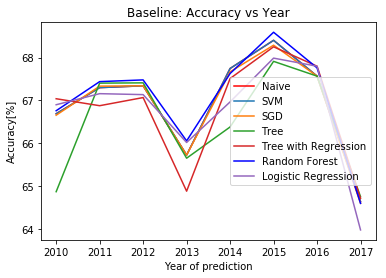

In [ ]:
plt.plot(years, [100*i.y_naive for i in random_forest_baseline_results], 'r')
plt.plot(years, [100*i.accuracy for i in svm_baseline_results])
plt.plot(years, [100*i.accuracy for i in sgd_baseline_results])
plt.plot(years, [100*i.accuracy for i in tree_baseline_results])
plt.plot(years, [100*i.accuracy for i in tree_regression_baseline_results])
plt.plot(years, [100*i.accuracy for i in random_forest_baseline_results], 'b')
plt.plot(years, [100*i.accuracy for i in regression_baseline_results])

plt.title('Baseline: Accuracy vs Year')
plt.legend(['Naive', 'SVM', 'SGD', 'Tree', 'Tree with Regression', 'Random Forest', 'Logistic Regression'])
plt.xlabel('Year of prediction')
plt.ylabel('Accuracy[%]')
plt.savefig('accuracy_2010-2017_all_models_newest.png', dpi = 300)

plt.show()

## Graph 2: Improvement per year for all models

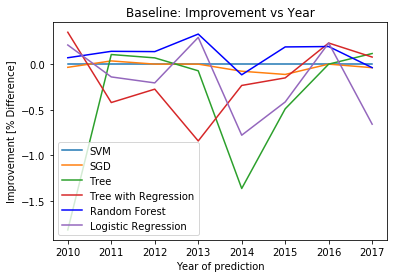

In [ ]:
plt.plot(years, [i.improvement for i in svm_baseline_results])
plt.plot(years, [i.improvement for i in sgd_baseline_results])
plt.plot(years, [i.improvement for i in tree_baseline_results])
plt.plot(years, [i.improvement for i in tree_regression_baseline_results])
plt.plot(years, [i.improvement for i in random_forest_baseline_results], 'b')
plt.plot(years, [i.improvement for i in regression_baseline_results])

plt.title('Baseline: Improvement vs Year')
plt.legend(['SVM', 'SGD', 'Tree', 'Tree with Regression', 'Random Forest', 'Logistic Regression'])
plt.xlabel('Year of prediction')
plt.ylabel('Improvement [% Difference]')
plt.savefig('improvement_2010-2017_all_models_newest.png', dpi = 300)
plt.show()

## Graph 3: Runtime per year for all models

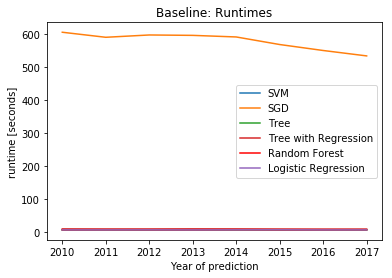

In [ ]:
plt.plot(years, [i.runtime for i in svm_baseline_results])
plt.plot(years, [i.runtime for i in sgd_baseline_results])
plt.plot(years, [i.runtime for i in tree_baseline_results])
plt.plot(years, [i.runtime for i in tree_regression_baseline_results])
plt.plot(years, [i.runtime for i in random_forest_baseline_results], 'r')
plt.plot(years, [i.runtime for i in regression_baseline_results])

# plt.plot(years, y_RandomForest)
plt.title('Baseline: Runtimes')
plt.legend(['SVM', 'SGD', 'Tree', 'Tree with Regression', 'Random Forest', 'Logistic Regression'])
plt.xlabel('Year of prediction')
plt.ylabel('runtime [seconds]')
plt.savefig('runtime_2010-2017_all_models_newest.png', dpi = 300)
plt.show()

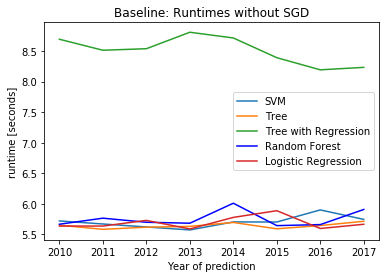

In [ ]:
plt.plot(years, [i.runtime for i in svm_baseline_results])
# plt.plot(years, [i.runtime for i in sgd_baseline_results])
plt.plot(years, [i.runtime for i in tree_baseline_results])
plt.plot(years, [i.runtime for i in tree_regression_baseline_results])
plt.plot(years, [i.runtime for i in random_forest_baseline_results], 'b')
plt.plot(years, [i.runtime for i in regression_baseline_results])

# plt.plot(years, y_RandomForest)
plt.title('Baseline: Runtimes without SGD')
plt.legend(['SVM', 'Tree', 'Tree with Regression', 'Random Forest', 'Logistic Regression'])
plt.xlabel('Year of prediction')
plt.ylabel('runtime [seconds]')
plt.savefig('runtime_2010-2017_all_models_without_svm_sgd_newest.png', dpi = 300)
plt.show()

## Graph 4: Upsets and No-Upsets predicted vs Actual per year for all models

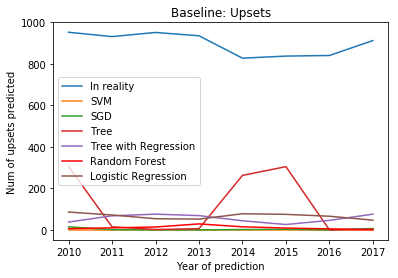

In [ ]:
plt.plot(years, [i.minus_ones_actual for i in random_forest_baseline_results])
plt.plot(years, [i.minus_ones_predicted for i in svm_baseline_results])
plt.plot(years, [i.minus_ones_predicted for i in sgd_baseline_results])
plt.plot(years, [i.minus_ones_predicted for i in tree_baseline_results])
plt.plot(years, [i.minus_ones_predicted for i in tree_regression_baseline_results])
plt.plot(years, [i.minus_ones_predicted for i in random_forest_baseline_results], 'r')
plt.plot(years, [i.minus_ones_predicted for i in regression_baseline_results])

# plt.plot(years, y_RandomForest)
plt.title('Baseline: Upsets')
plt.legend(['In reality', 'SVM', 'SGD', 'Tree', 'Tree with Regression', 'Random Forest', 'Logistic Regression'])
plt.xlabel('Year of prediction')
plt.ylabel('Num of upsets predicted')
plt.savefig('upsets_predicted_2010-2017_all_models_newest.png', dpi = 300)
plt.show()

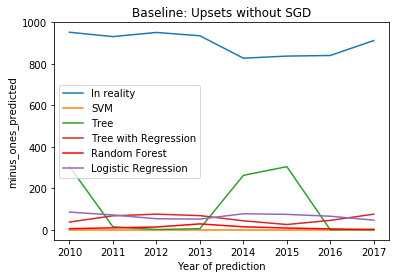

In [ ]:
plt.plot(years, [i.minus_ones_actual for i in random_forest_baseline_results])
plt.plot(years, [i.minus_ones_predicted for i in svm_baseline_results])
plt.plot(years, [i.minus_ones_predicted for i in tree_baseline_results])
plt.plot(years, [i.minus_ones_predicted for i in tree_regression_baseline_results])
plt.plot(years, [i.minus_ones_predicted for i in random_forest_baseline_results], 'r')
plt.plot(years, [i.minus_ones_predicted for i in regression_baseline_results])

plt.title('Baseline: Upsets without SGD')
plt.legend(['In reality', 'SVM', 'Tree', 'Tree with Regression', 'Random Forest', 'Logistic Regression'])
plt.xlabel('Year of prediction')
plt.ylabel('minus_ones_predicted')
plt.savefig('upsets_predicted_2010-2017_all_models_without_sgd_newest.png', dpi = 300)
plt.show()

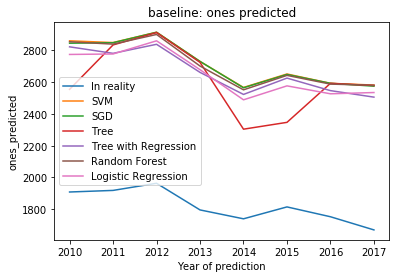

In [ ]:
plt.plot(years, [i.ones_actual for i in random_forest_baseline_results])
plt.plot(years, [i.ones_predicted for i in svm_baseline_results])
plt.plot(years, [i.ones_predicted for i in sgd_baseline_results])
plt.plot(years, [i.ones_predicted for i in tree_baseline_results])
plt.plot(years, [i.ones_predicted for i in tree_regression_baseline_results])
plt.plot(years, [i.ones_predicted for i in random_forest_baseline_results])
plt.plot(years, [i.ones_predicted for i in regression_baseline_results])

# plt.plot(years, y_RandomForest)
plt.title('baseline: ones predicted')
plt.legend(['In reality', 'SVM', 'SGD', 'Tree', 'Tree with Regression', 'Random Forest', 'Logistic Regression'])
plt.xlabel('Year of prediction')
plt.ylabel('ones_predicted')
plt.savefig('no_upsets_predicted_2010-2017_all_models_newest.png', dpi = 300)
plt.show()

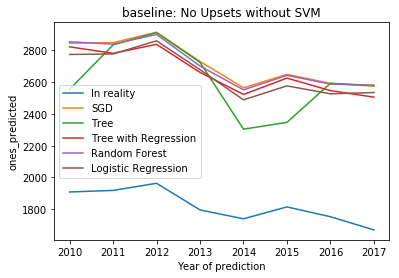

In [ ]:
plt.plot(years, [i.ones_actual for i in regression_baseline_results])
plt.plot(years, [i.ones_predicted for i in sgd_baseline_results])
plt.plot(years, [i.ones_predicted for i in tree_baseline_results])
plt.plot(years, [i.ones_predicted for i in tree_regression_baseline_results])
plt.plot(years, [i.ones_predicted for i in random_forest_baseline_results])
plt.plot(years, [i.ones_predicted for i in regression_baseline_results])

# plt.plot(years, y_RandomForest)
plt.title('baseline: No Upsets without SVM')
plt.legend(['In reality', 'SGD', 'Tree', 'Tree with Regression', 'Random Forest', 'Logistic Regression'])
plt.xlabel('Year of prediction')
plt.ylabel('ones_predicted')
plt.savefig('no_upsets_predicted_2010-2017_without_SVM_newest.png', dpi = 300)
plt.show()

## The Chosen model

Random Forest gave the best results and was also the most robust along the years.
Furthermore, it had short runtimes and it can be paralleled.
Therefore, from now on we will only work with Random Forest.

### Before Division

In [ ]:
# Best run for all matches 

file_name = "datasets\\manipulated_datasets\\all_matches_with_our_features.csv"
my_data = pd.read_csv(file_name)
subset =        ranks+ages+[
                'higher_ranked_player_winning_streak', 'lower_ranked_player_winning_streak',
                'higher_ranked_player_longest_winning_streak', 'lower_ranked_player_longest_winning_streak',
                'higher_ranked_player_winning_percentage', 'lower_ranked_player_winning_percentage',
                'higher_ranked_player_last_level_reached', 'lower_ranked_player_last_level_reached',
                'higher_ranked_player_upsets_against',
                'higher_ranked_player_one_level_history_no_upset_rank_difference', 'lower_ranked_player_one_level_history_no_upset_rank_difference',

]

years = [i for i in range(2006,2006+12)]

model_results = []
for year in years:
    print(year)
    test_date = year*10000
    start_date = test_date - 9*10000
    result = tennis_prediction(file_name, subset, algorithm='random_forest', kwargs={'random_state':49,'n_estimators':160,'max_depth':9}, print_results=False, print_naive=False, start_date=start_date, test_date=test_date, num_of_years_to_test=1)
    print('the improvement is: ', result.improvement)
    model_results.append(result)
    
print ('Accuracy average: ', statistics.mean([100*i.accuracy for i in model_results]), 'with Standart Deviation of: ', statistics.stdev([100*i.accuracy for i in model_results]) )
print ('Improvement average: ', statistics.mean([i.improvement for i in model_results]), 'with Standart Deviation of: ', statistics.stdev([i.improvement for i in model_results]) )


2006
the improvement is:  1.2894906511927706
2007
the improvement is:  2.546959567016871
2008
the improvement is:  0.8287292817679592
2009
the improvement is:  1.6846361185983816
2010
the improvement is:  2.275815217391308
2011
the improvement is:  2.0783645655877314
2012
the improvement is:  2.164502164502158
2013
the improvement is:  1.5861825872400481
2014
the improvement is:  1.5544041450777257
2015
the improvement is:  2.2338568935427516
2016
the improvement is:  1.3083451202263063
2017
the improvement is:  1.4013654329859904
Accuracy average:  67.81101303405221 with Standart Deviation of:  1.1921647038303482
Improvement average:  1.746054312094167 with Standart Deviation of:  0.5109680838223962


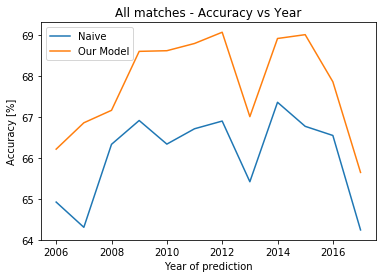

In [ ]:
plt.title('All matches - Accuracy vs Year')
plt.plot(years, [100*i.y_naive for i in model_results])
plt.plot(years, [100*i.accuracy for i in model_results])
plt.legend(['Naive', 'Our Model'])
plt.xlabel('Year of prediction')
plt.ylabel('Accuracy [%]')
plt.savefig('All_matches_matches_Accuracy_2006-2017.png', dpi = 300)
plt.show()

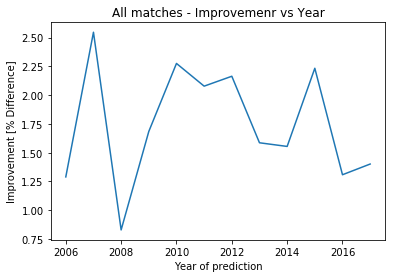

In [ ]:
plt.title('All matches - Improvemenr vs Year')
plt.plot(years, [i.improvement for i in model_results])
plt.xlabel('Year of prediction')
plt.ylabel('Improvement [% Difference]')
plt.savefig('All_matches_matches_Improvement_2006-2017.png', dpi = 300)
plt.show()

## Division By surface type

All features are created for matches on a specific surface¶

### Grass

In [ ]:
# try to find the best 'n_estimators'
# Show Maor the results!!!!
file_name = "datasets\\manipulated_datasets\\Grass_surface_matches.csv"
my_data = pd.read_csv(file_name)
subset =        ranks+ages+[
                'higher_ranked_player_winning_streak', 
                'lower_ranked_player_winning_streak',
    
                'higher_ranked_player_longest_winning_streak',
                'lower_ranked_player_longest_winning_streak',
    
                'higher_ranked_player_losing_streak',
                'lower_ranked_player_losing_streak',
#                 'higher_ranked_player_max_losing_streak', 'lower_ranked_player_max_losing_streak',
    
                'higher_ranked_player_one_level_history_outcome', 'lower_ranked_player_one_level_history_outcome',
#                 'higher_ranked_player_twenty_level_history_wins_percentage', 'lower_ranked_player_twenty_level_history_wins_percentage',
#                 'higher_ranked_player_three_level_history_outcome', 'lower_ranked_player_three_level_history_outcome',
                'higher_ranked_player_winning_percentage', 'lower_ranked_player_winning_percentage',
                'higher_ranked_player_last_level_reached', 'lower_ranked_player_last_level_reached',
                'higher_ranked_player_one_level_history_no_upset_rank_difference', 'lower_ranked_player_one_level_history_no_upset_rank_difference',
                'higher_ranked_player_one_level_history_upset_rank_difference', 'lower_ranked_player_one_level_history_upset_rank_difference',    
                
#                 'higher_ranked_player_four_level_history_wins_percentage', 'lower_ranked_player_four_level_history_wins_percentage',
#                 'higher_ranked_player_one_level_history_sets_difference', 'lower_ranked_player_one_level_history_sets_difference',
#                 'higher_ranked_player_one_level_history_points_difference', 'lower_ranked_player_one_level_history_points_difference',
#                 'higher_ranked_player_three_level_history_no_upset_rank_difference', 'lower_ranked_player_three_level_history_no_upset_rank_difference',
    
#     'higher_ranked_player_upsets_for',
#     'higher_ranked_player_upsets_for_normalized',
#     'higher_ranked_player_upsets_against',
    

]

years = [i for i in range(2001,2001+17)]
naive = []
Grass_results = []

improvements = []
for year in years:
    print(year)
    test_date =year*10000
    start_date = test_date - 9*10000
    result = tennis_prediction(file_name, subset, algorithm='random_forest',kwargs={'random_state':49,'n_estimators':160,'max_depth':9}, print_results=False, print_naive=False, start_date=start_date, test_date=test_date, num_of_years_to_test=1)
    print('the improvement is: ', result.improvement)
    Grass_results.append(result)

print ('Accuracy average: ', statistics.mean([100*i.accuracy for i in Grass_results]), 'with Standart Deviation of: ', statistics.stdev([100*i.accuracy for i in Grass_results]) )
print ('Improvement average: ', statistics.mean([i.improvement for i in Grass_results]), 'with Standart Deviation of: ', statistics.stdev([i.improvement for i in Grass_results]) )

2001
the improvement is:  4.379562043795615
2002
the improvement is:  4.230769230769238
2003
the improvement is:  7.722007722007717
2004
the improvement is:  5.263157894736848
2005
the improvement is:  1.754385964912275
2006
the improvement is:  8.041958041958042
2007
the improvement is:  0.7194244604316502
2008
the improvement is:  4.395604395604402
2009
the improvement is:  1.7985611510791366
2010
the improvement is:  0.390625
2011
the improvement is:  -0.6944444444444531
2012
the improvement is:  2.3880597014925398
2013
the improvement is:  6.716417910447758
2014
the improvement is:  1.5151515151515138
2015
the improvement is:  1.661129568106312
2016
the improvement is:  2.006688963210701
2017
the improvement is:  2.8469750889679735
Accuracy average:  68.74612230714672 with Standart Deviation of:  2.1821990818593906
Improvement average:  3.2432961298957217 with Standart Deviation of:  2.5623165044338374


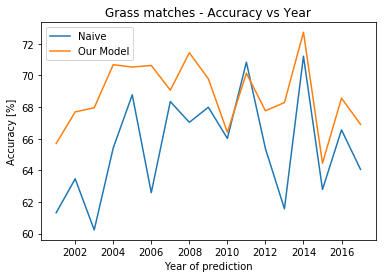

In [ ]:
plt.title('Grass matches - Accuracy vs Year')
plt.plot(years, [100*i.y_naive for i in Grass_results])
plt.plot(years, [100*i.accuracy for i in Grass_results])
plt.legend(['Naive', 'Our Model'])
plt.xlabel('Year of prediction')
plt.ylabel('Accuracy [%]')
plt.savefig('Grass_matches_Accuracy_2001-2017.png', dpi = 300)
plt.show()

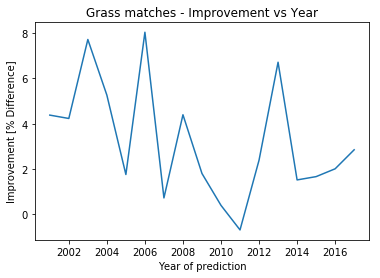

In [ ]:
plt.title('Grass matches - Improvement vs Year')
plt.plot(years, [i.improvement for i in Grass_results])
plt.xlabel('Year of prediction')
plt.ylabel('Improvement [% Difference]')
plt.savefig('Grass_matches_Improvement_2001-2017.png', dpi = 300)
plt.show()

## Hard

In [ ]:
# try to find the best 'n_estimators'
# Show Maor the results!!!!
#Hard
file_name = "datasets\\manipulated_datasets\\Hard_surface_matches.csv"
my_data = pd.read_csv(file_name)
subset =    ranks+hands+ages+[
                'higher_ranked_player_winning_streak', 'lower_ranked_player_winning_streak',
                'higher_ranked_player_longest_winning_streak', 'lower_ranked_player_longest_winning_streak',
                'higher_ranked_player_one_level_history_outcome', 'lower_ranked_player_one_level_history_outcome',
                'higher_ranked_player_winning_percentage', 'lower_ranked_player_winning_percentage',
                'higher_ranked_player_last_level_reached', 'lower_ranked_player_last_level_reached',
                'higher_ranked_player_one_level_history_no_upset_rank_difference', 'lower_ranked_player_one_level_history_no_upset_rank_difference',
                'higher_ranked_player_one_level_history_points_difference', 'lower_ranked_player_one_level_history_points_difference',
                'higher_ranked_player_upsets_for',
                'lower_ranked_player_upsets_for',
                'higher_ranked_player_upsets_against',
                'lower_ranked_player_upsets_against',
                'lower_ranked_player_last_level_reached_minus_current_level',
]

years = [i for i in range(2006,2006+12)]
Hard_results = []
for year in years:
    print(year)
    test_date = year*10000
    start_date = test_date - 9*10000
    result = tennis_prediction(file_name, subset, algorithm='random_forest',kwargs={'random_state':49,'n_estimators':160,'max_depth':9}, print_results=False, print_naive=False, start_date=start_date, test_date=test_date, num_of_years_to_test=1)
    print('the improvement is: ', result.improvement)
    Hard_results.append(result)
    
print ('Accuracy average: ', statistics.mean([100*i.accuracy for i in Hard_results]), 'with Standart Deviation of: ', statistics.stdev([100*i.accuracy for i in Hard_results]) )
print ('Improvement average: ', statistics.mean([i.improvement for i in Hard_results]), 'with Standart Deviation of: ', statistics.stdev([i.improvement for i in Hard_results]) )

2006
the improvement is:  1.96629213483146
2007
the improvement is:  3.073140749846337
2008
the improvement is:  2.2696929238985364
2009
the improvement is:  1.7879161528976617
2010
the improvement is:  2.055622732769058
2011
the improvement is:  2.5246305418719195
2012
the improvement is:  2.6897788404064538
2013
the improvement is:  1.8832391713747731
2014
the improvement is:  1.671309192200554
2015
the improvement is:  1.9030079803560418
2016
the improvement is:  0.8604794099569824
2017
the improvement is:  2.0077720207253957
Accuracy average:  68.52211733355396 with Standart Deviation of:  1.1718332610852813
Improvement average:  2.0577401542612646 with Standart Deviation of:  0.5571229444592285


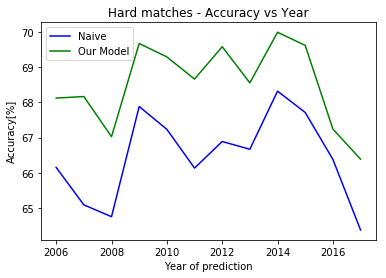

In [ ]:
plt.title('Hard matches - Accuracy vs Year')
plt.plot(years, [100*i.y_naive for i in Hard_results], 'b')
plt.plot(years, [100*i.accuracy for i in Hard_results], 'g')
plt.legend(['Naive', 'Our Model'])
plt.xlabel('Year of prediction')
plt.ylabel('Accuracy[%]')
plt.savefig('Hard_matches_Accuracy_2006-2017.png', dpi = 300)
plt.show()

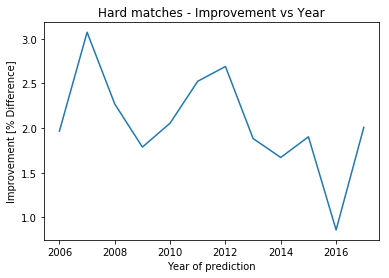

In [ ]:
plt.title('Hard matches - Improvement vs Year')
plt.plot(years, [i.improvement for i in Hard_results])
plt.xlabel('Year of prediction')
plt.ylabel('Improvement [% Difference]')
plt.savefig('Hard_matches_Improvement_2006-2017.png', dpi = 300)
plt.show()

## Clay

In [ ]:
# try to find the best 'n_estimators'
# Show Maor the results!!!!
#Clay
file_name = "datasets\\manipulated_datasets\\Clay_surface_matches.csv"
my_data = pd.read_csv(file_name)
subset =        ranks+ages+hands+[
                'higher_ranked_player_winning_streak', 'lower_ranked_player_winning_streak',
                'higher_ranked_player_longest_winning_streak', 'lower_ranked_player_longest_winning_streak',
        
#                 'higher_ranked_player_three_level_history_outcome', 'lower_ranked_player_three_level_history_outcome',
                'higher_ranked_player_winning_percentage', 'lower_ranked_player_winning_percentage',
                'higher_ranked_player_last_level_reached', 'lower_ranked_player_last_level_reached',
    
#                 'higher_ranked_player_four_level_history_wins_percentage', 'lower_ranked_player_four_level_history_wins_percentage',
#                 'higher_ranked_player_one_level_history_sets_difference', 'lower_ranked_player_one_level_history_sets_difference',
#                 'higher_ranked_player_one_level_history_points_difference', 'lower_ranked_player_one_level_history_points_difference',
#                 'higher_ranked_player_three_level_history_no_upset_rank_difference', 'lower_ranked_player_three_level_history_no_upset_rank_difference',

]

years = [i for i in range(2001,2001+17)]
Clay_results = []
for year in years:
    print(year)
    test_date =year*10000
    start_date = test_date - 10*10000
    result = tennis_prediction(file_name, subset, algorithm='random_forest',kwargs={'random_state':49,'n_estimators':160,'max_depth':7}, print_results=False, print_naive=False, start_date=start_date, test_date=test_date, num_of_years_to_test=1)
    print('the improvement is: ', result.improvement)
    Clay_results.append(result)

print ('Accuracy average: ', statistics.mean([100*i.accuracy for i in Clay_results]), 'with Standart Deviation of: ', statistics.stdev([100*i.accuracy for i in Clay_results]) )
print ('Improvement average: ', statistics.mean([i.improvement for i in Clay_results]), 'with Standart Deviation of: ', statistics.stdev([i.improvement for i in Clay_results]) )

2001
the improvement is:  1.5252621544327938
2002
the improvement is:  2.0854021847070525
2003
the improvement is:  1.7804154302670572
2004
the improvement is:  2.259332023575644
2005
the improvement is:  3.513770180436837
2006
the improvement is:  1.6283524904214475
2007
the improvement is:  3.2291666666666607
2008
the improvement is:  1.0427528675703845
2009
the improvement is:  1.0741138560687369
2010
the improvement is:  2.986725663716805
2011
the improvement is:  0.5364806866952843
2012
the improvement is:  1.76795580110497
2013
the improvement is:  1.9340159271899915
2014
the improvement is:  1.6786570743405393
2015
the improvement is:  1.7709563164108544
2016
the improvement is:  2.1013597033374576
2017
the improvement is:  0.7407407407407418
Accuracy average:  66.74008396990175 with Standart Deviation of:  2.2523673374183923
Improvement average:  1.8620858686872506 with Standart Deviation of:  0.8164059742553483


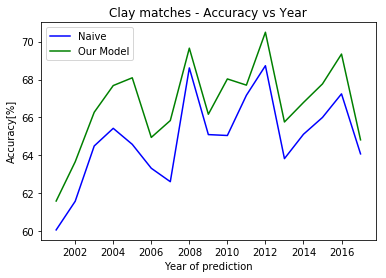

In [ ]:
plt.title('Clay matches - Accuracy vs Year')
plt.plot(years, [100*i.y_naive for i in Clay_results], 'b')
plt.plot(years, [100*i.accuracy for i in Clay_results], 'g')
plt.legend(['Naive', 'Our Model'])
plt.xlabel('Year of prediction')
plt.ylabel('Accuracy[%]')
plt.savefig('Clay_matches_Accuracy_2001-2017.png', dpi = 300)
plt.show()

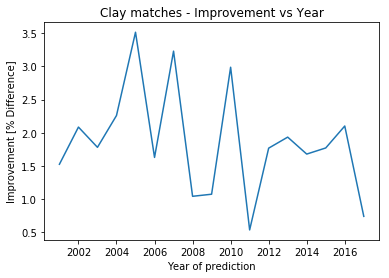

In [ ]:
plt.title('Clay matches - Improvement vs Year')
plt.plot(years, [i.improvement for i in Clay_results])
plt.xlabel('Year of prediction')
plt.ylabel('Improvement [% Difference]')
plt.savefig('Clay_matches_Improvement_2001-2017.png', dpi = 300)
plt.show()

## Division By Rank difference (Close matches)

In [ ]:
# Best run for all matches 

file_name = "datasets\\manipulated_datasets\\all_matches_with_our_features.csv"
my_data = pd.read_csv(file_name)
subset =        ranks+ages+[
                'higher_ranked_player_winning_streak', 'lower_ranked_player_winning_streak',
                'higher_ranked_player_longest_winning_streak', 'lower_ranked_player_longest_winning_streak',
                'higher_ranked_player_winning_percentage', 'lower_ranked_player_winning_percentage',
                'higher_ranked_player_last_level_reached', 'lower_ranked_player_last_level_reached',
                'higher_ranked_player_upsets_against',
#                 'higher_ranked_player_one_level_history_no_upset_rank_difference', 'lower_ranked_player_one_level_history_no_upset_rank_difference',

]

years = [i for i in range(2006,2006+12)]

Close_matches_results = []
for year in years:
    print(year)
    test_date = year*10000
    start_date = test_date - 9*10000
    result = tennis_prediction(file_name, subset, close_matches='only', algorithm='random_forest', kwargs={'random_state':49,'n_estimators':160,'max_depth':9}, print_results=False, print_naive=False, start_date=start_date, test_date=test_date, num_of_years_to_test=1)
    print('the improvement is: ', result.improvement)
    Close_matches_results.append(result)
    
print ('Accuracy average: ', statistics.mean([100*i.accuracy for i in Close_matches_results]), 'with Standart Deviation of: ', statistics.stdev([100*i.accuracy for i in Close_matches_results]) )
print ('Improvement average: ', statistics.mean([i.improvement for i in Close_matches_results]), 'with Standart Deviation of: ', statistics.stdev([i.improvement for i in Close_matches_results]) )

2006
the improvement is:  10.550458715596323
2007
the improvement is:  7.6271186440677985
2008
the improvement is:  9.691629955947134
2009
the improvement is:  10.62271062271063
2010
the improvement is:  5.952380952380953
2011
the improvement is:  16.730038022813687
2012
the improvement is:  11.89591078066915
2013
the improvement is:  4.8872180451127845
2014
the improvement is:  13.716814159292024
2015
the improvement is:  16.603773584905667
2016
the improvement is:  7.555555555555548
2017
the improvement is:  5.47945205479452
Accuracy average:  62.84024023026617 with Standart Deviation of:  3.25125603955219
Improvement average:  10.109421757820519 with Standart Deviation of:  4.062238501228901


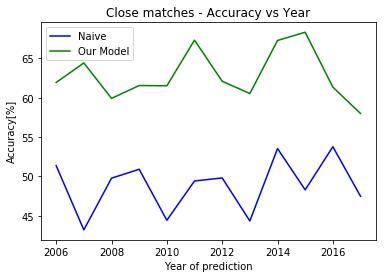

In [ ]:
plt.title('Close matches - Accuracy vs Year')
plt.plot(years, [100*i.y_naive for i in Close_matches_results], 'b')
plt.plot(years, [100*i.accuracy for i in Close_matches_results], 'g')
plt.legend(['Naive', 'Our Model'])
plt.xlabel('Year of prediction')
plt.ylabel('Accuracy[%]')
plt.savefig('Close_matches_Accuracy_2006-2017.png', dpi = 300)
plt.show()

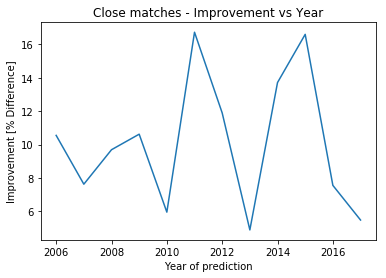

In [ ]:
plt.title('Close matches - Improvement vs Year')
plt.plot(years, [i.improvement for i in Close_matches_results])
plt.xlabel('Year of prediction')
plt.ylabel('Improvement [% Difference]')
plt.savefig('Close_matches_Improvement_2006-2017.png', dpi = 300)
plt.show()

## Division By Tournament

In [ ]:
file_name = "datasets\\manipulated_datasets\\Wimbledon_tournament_matches.csv"
my_data = pd.read_csv(file_name)
subset =        ranks+['round',
                'higher_ranked_player_last_level_reached', 'lower_ranked_player_last_level_reached',
                'higher_ranked_player_winning_streak', 'lower_ranked_player_winning_streak',
                'higher_ranked_player_longest_winning_streak', 'lower_ranked_player_longest_winning_streak',
                'higher_ranked_player_one_level_history_outcome', 'lower_ranked_player_one_level_history_outcome',
                'higher_ranked_player_two_level_history_outcome', 'lower_ranked_player_two_level_history_outcome',

               ]



for ii in range(12):
    test_date = 20060000+ii*10000
    start_date = test_date - 4*10000
    print(test_date)
    result = tennis_prediction(file_name, subset, algorithm='svm',kwargs={'kernel':'rbf', 'max_iter':20000000}, print_results=False, print_naive=False, print_improvement=True, start_date=start_date, test_date=test_date, num_of_years_to_test=1)


20060000
The Improvement is: 1.06 %
20070000
The Improvement is: -2.38 %
20080000
The Improvement is: 0.00 %
20090000
The Improvement is: 0.00 %
20100000
The Improvement is: -1.30 %
20110000
The Improvement is: 1.05 %
20120000
The Improvement is: 1.11 %
20130000
The Improvement is: 0.97 %
20140000
The Improvement is: -0.00 %
20150000
The Improvement is: -1.06 %
20160000
The Improvement is: -1.94 %
20170000
The Improvement is: 1.12 %


In [ ]:
file_name = "datasets\\manipulated_datasets\\Wimbledon_tournament_matches.csv"
my_data = pd.read_csv(file_name)
subset =        ranks+[
                'higher_ranked_player_last_level_reached', 'lower_ranked_player_last_level_reached',
                'higher_ranked_player_winning_streak', 'lower_ranked_player_winning_streak',
                'higher_ranked_player_longest_winning_streak', 'lower_ranked_player_longest_winning_streak',
#                 'higher_ranked_player_one_level_history_outcome', 'lower_ranked_player_one_level_history_outcome',
#                 'higher_ranked_player_two_level_history_outcome', 'lower_ranked_player_two_level_history_outcome',
#                 'higher_ranked_player_three_level_history_outcome', 'lower_ranked_player_three_level_history_outcome',
                'higher_ranked_player_winning_percentage', 'lower_ranked_player_winning_percentage',
                'higher_ranked_player_last_level_reached', 'lower_ranked_player_last_level_reached',
#                 'higher_ranked_player_two_level_history_wins', 'lower_ranked_player_two_level_history_wins',
#                 'higher_ranked_player_two_level_history_points_difference', 'lower_ranked_player_two_level_history_points_difference',
               ]
start_date = 20060000
test_date=20170000

result = tennis_prediction(file_name, subset, algorithm='random_forest',kwargs={'n_estimators':160,'max_depth':9}, print_results=False, print_improvement=True, start_date=start_date, test_date=test_date, num_of_years_to_test=1)


The Improvement is: 2.13 %


In [ ]:
file_name = "datasets\\manipulated_datasets\\Wimbledon_tournament_matches.csv"
my_data = pd.read_csv(file_name)
subset = my_data.drop(['tag', 'score', 'surface',
                       'tourney_level', 'tourney_name', 'tourney_id',
                       'higher_ranked_player_name', 'lower_ranked_player_name',
                      'higher_ranked_player_id', 'lower_ranked_player_id'], axis=1).columns
for feature in subset:
    print(feature)

Unnamed: 0
Unnamed: 0.1
Unnamed: 0.1.1
higher_ranked_player_height
lower_ranked_player_height
higher_ranked_player_age
lower_ranked_player_age
higher_ranked_player_rank
lower_ranked_player_rank
higher_ranked_player_rank_points
lower_ranked_player_rank_points
draw_size
tourney_date
match_num
best_of
round
higher_ranked_player_hand_L
higher_ranked_player_hand_R
higher_ranked_player_hand_U
lower_ranked_player_hand_L
lower_ranked_player_hand_R
lower_ranked_player_hand_U
height_differences
rank_differences
rank_differences_normalized
rank_differences_multiplied
last_match_points_difference_normalized
match_year
higher_ranked_player_rank_normalized_by_num_of_players
lower_ranked_player_rank_normalized_by_num_of_players
higher_ranked_player_last_match_minutes
lower_ranked_player_last_match_minutes
higher_ranked_player_last_level_reached_minus_current_level
lower_ranked_player_last_level_reached_minus_current_level
player_upsets_for
player_upsets_against
higher_ranked_player_one_level_history_

In [ ]:
file_name = "datasets\\manipulated_datasets\\Wimbledon_tournament_matches.csv"
my_data = pd.read_csv(file_name)
subset = my_data.columns.drop(['tag', 'Unnamed: 0'])

In [ ]:
# ~82% on 2012!!
file_name = "datasets\\manipulated_datasets\\Wimbledon_tournament_matches.csv"
my_data = pd.read_csv(file_name)
subset =        ranks+[#hands+[
#                 'higher_ranked_player_last_level_reached', 'lower_ranked_player_last_level_reached',
                'higher_ranked_player_winning_streak', 'lower_ranked_player_winning_streak',
#                 'higher_ranked_player_longest_winning_streak', 'lower_ranked_player_longest_winning_streak',
                'higher_ranked_player_one_level_history_outcome', 'lower_ranked_player_one_level_history_outcome',
#                 'higher_ranked_player_two_level_history_outcome', 'lower_ranked_player_two_level_history_outcome',
                'higher_ranked_player_three_level_history_outcome', 'lower_ranked_player_three_level_history_outcome',
                'higher_ranked_player_winning_percentage', 'lower_ranked_player_winning_percentage',
                'higher_ranked_player_last_level_reached', 'lower_ranked_player_last_level_reached',
#                 'higher_ranked_player_two_level_history_wins', 'lower_ranked_player_two_level_history_wins'
               ]
for ii in range(11):
    test_date = 20060000+ii*10000
    start_date = test_date - 6*10000
    print(test_date/10000)
    result = tennis_prediction(file_name, subset, algorithm='svm',kwargs={'kernel':'linear', 'max_iter':300000}, print_improvement=True, start_date=start_date, test_date=test_date, num_of_years_to_test=3)


2006.0


C:\Users\vakni\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=300000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


The Improvement is: 3.49 %
2007.0
The Improvement is: 1.31 %
2008.0
The Improvement is: 1.82 %
2009.0
The Improvement is: -1.35 %
2010.0
The Improvement is: 3.57 %
2011.0
The Improvement is: 2.40 %
2012.0
The Improvement is: 3.20 %
2013.0
The Improvement is: 0.00 %
2014.0
The Improvement is: 1.19 %
2015.0
The Improvement is: 0.00 %
2016.0
The Improvement is: -0.00 %


In [ ]:
# ~82% on 2012!!
file_name = "datasets\\manipulated_datasets\\Wimbledon_tournament_matches.csv"
my_data = pd.read_csv(file_name)
subset =        ranks+[#hands+[
#                 'higher_ranked_player_last_level_reached', 'lower_ranked_player_last_level_reached',
                'higher_ranked_player_winning_streak', 'lower_ranked_player_winning_streak',
#                 'higher_ranked_player_longest_winning_streak', 'lower_ranked_player_longest_winning_streak',
                'higher_ranked_player_one_level_history_outcome', 'lower_ranked_player_one_level_history_outcome',
                'higher_ranked_player_two_level_history_outcome', 'lower_ranked_player_two_level_history_outcome',
                'higher_ranked_player_three_level_history_outcome', 'lower_ranked_player_three_level_history_outcome',
                'higher_ranked_player_winning_percentage', 'lower_ranked_player_winning_percentage',
                'higher_ranked_player_last_level_reached', 'lower_ranked_player_last_level_reached',
#                 'higher_ranked_player_two_level_history_wins', 'lower_ranked_player_two_level_history_wins'
               ]
for ii in range(11):
    test_date = 20060000+ii*10000
    start_date = test_date - 5*10000
    print(test_date/10000)
    result = tennis_prediction(file_name, subset, algorithm='random_forest', print_improvement=True,kwargs={'n_estimators':160, 'max_depth':9}, print_results=False, start_date=start_date, test_date=test_date, num_of_years_to_test=1)


2006.0
The Improvement is: 2.53 %
2007.0
The Improvement is: -8.22 %
2008.0
The Improvement is: 6.49 %
2009.0
The Improvement is: -1.27 %
2010.0
The Improvement is: -6.25 %
2011.0
The Improvement is: 0.00 %
2012.0
The Improvement is: 5.00 %
2013.0
The Improvement is: 1.11 %
2014.0
The Improvement is: -2.50 %
2015.0
The Improvement is: -4.94 %
2016.0
The Improvement is: -3.26 %


In [ ]:
# ~82% on 2012!!
file_name = "datasets\\manipulated_datasets\\Roland Garros_tournament_matches.csv"
my_data = pd.read_csv(file_name)
subset =        ranks+hands+[
#                 'higher_ranked_player_last_level_reached', 'lower_ranked_player_last_level_reached',
                'higher_ranked_player_winning_streak', 'lower_ranked_player_winning_streak',
#                 'higher_ranked_player_longest_winning_streak', 'lower_ranked_player_longest_winning_streak',
                'higher_ranked_player_one_level_history_outcome', 'lower_ranked_player_one_level_history_outcome',
                'higher_ranked_player_two_level_history_outcome', 'lower_ranked_player_two_level_history_outcome',
                'higher_ranked_player_three_level_history_outcome', 'lower_ranked_player_three_level_history_outcome',
#                 'higher_ranked_player_winning_percentage', 'lower_ranked_player_winning_percentage',
                'higher_ranked_player_last_level_reached', 'lower_ranked_player_last_level_reached',
#                 'higher_ranked_player_two_level_history_wins', 'lower_ranked_player_two_level_history_wins'
               ]
for ii in range(11):
    test_date = 20060000+ii*10000
    start_date = test_date - 3*10000
    print(test_date)
    result = tennis_prediction(file_name, subset, algorithm='random_forest', print_improvement=True ,kwargs={'n_estimators':37, 'max_depth':9}, start_date=start_date, test_date=test_date, num_of_years_to_test=1)


20060000
The Improvement is: -8.70 %
20070000
The Improvement is: -8.00 %
20080000
The Improvement is: 4.48 %
20090000
The Improvement is: -1.43 %
20100000
The Improvement is: 2.94 %
20110000
The Improvement is: -13.41 %
20120000
The Improvement is: -5.81 %
20130000
The Improvement is: -2.41 %
20140000
The Improvement is: -3.66 %
20150000
The Improvement is: -3.37 %
20160000
The Improvement is: -1.16 %


In [ ]:
# ~82% on 2012!!
file_name = "datasets\\manipulated_datasets\\Wimbledon_tournament_matches.csv"
my_data = pd.read_csv(file_name)
subset =        ranks+[#hands+[
#                 'higher_ranked_player_last_level_reached', 'lower_ranked_player_last_level_reached',
                'higher_ranked_player_winning_streak', 'lower_ranked_player_winning_streak',
#                 'higher_ranked_player_longest_winning_streak', 'lower_ranked_player_longest_winning_streak',
                'higher_ranked_player_one_level_history_outcome', 'lower_ranked_player_one_level_history_outcome',
                'higher_ranked_player_two_level_history_outcome', 'lower_ranked_player_two_level_history_outcome',
#                 'higher_ranked_player_three_level_history_outcome', 'lower_ranked_player_three_level_history_outcome',
                'higher_ranked_player_winning_percentage', 'lower_ranked_player_winning_percentage',
#                 'higher_ranked_player_last_level_reached', 'lower_ranked_player_last_level_reached',
#                 'higher_ranked_player_two_level_history_wins', 'lower_ranked_player_two_level_history_wins'
               ]
for ii in range(11):
    test_date = 20060000+ii*10000
    start_date = test_date - 9*10000
    print(test_date/10000)
    result = tennis_prediction(file_name, subset, algorithm='random_forest',kwargs={'n_estimators':160,'max_depth':9}, print_improvement=True, start_date=start_date, test_date=test_date, num_of_years_to_test=1)


2006.0
The Improvement is: 1.05 %
2007.0
The Improvement is: 0.00 %
2008.0
The Improvement is: 3.53 %
2009.0
The Improvement is: -3.30 %
2010.0
The Improvement is: -5.06 %
2011.0
The Improvement is: -2.08 %
2012.0
The Improvement is: 1.05 %
2013.0
The Improvement is: 7.77 %
2014.0
The Improvement is: 5.38 %
2015.0
The Improvement is: -6.32 %
2016.0
The Improvement is: -2.91 %


In [ ]:
# ~82% on 2012!!
file_name = "datasets\\manipulated_datasets\\Wimbledon_tournament_matches.csv"
my_data = pd.read_csv(file_name)
subset =        ranks+[#hands+[
#                 'higher_ranked_player_last_level_reached', 'lower_ranked_player_last_level_reached',
                'higher_ranked_player_winning_streak', 'lower_ranked_player_winning_streak',
#                 'higher_ranked_player_longest_winning_streak', 'lower_ranked_player_longest_winning_streak',
                'higher_ranked_player_one_level_history_outcome', 'lower_ranked_player_one_level_history_outcome',
                'higher_ranked_player_two_level_history_outcome', 'lower_ranked_player_two_level_history_outcome',
                'higher_ranked_player_three_level_history_outcome', 'lower_ranked_player_three_level_history_outcome',
                'higher_ranked_player_winning_percentage', 'lower_ranked_player_winning_percentage',
                'higher_ranked_player_last_level_reached', 'lower_ranked_player_last_level_reached',
#                 'higher_ranked_player_two_level_history_wins', 'lower_ranked_player_two_level_history_wins'
               ]
# for ii in range(11):
#     test_date = 20060000+ii*10000
#     start_date = test_date - 2*10000
#     print(test_date)
#     accuracy, estimator, X_test = tennis_prediction(file_name, subset_after_feature_importances, algorithm='random_forest',kwargs={'n_estimators':160,'max_depth':9}, print_results=True, start_date=start_date, test_date=test_date, num_of_years_to_test=1)

max_accuracy = 0
max_i = 0
for i in range(1,200):
    result = tennis_prediction(file_name, subset, algorithm='random_forest',kwargs={'n_estimators':i,'max_depth':9}, print_results=False, start_date=19940000, test_date=20020000, num_of_years_to_test=1, print_naive=False)
    if max_accuracy < result.accuracy:
        max_accuracy = result.accuracy
        max_i = i
print('max_accuracy: ', max_accuracy, 'at index: ', max_i)
    



max_accuracy:  0.7166666666666667 at index:  25


In [ ]:
# ~82% on 2012!!
file_name = "datasets\\manipulated_datasets\\Wimbledon_tournament_matches.csv"
my_data = pd.read_csv(file_name)
subset =        ranks+[#hands+[
#                 'higher_ranked_player_last_level_reached', 'lower_ranked_player_last_level_reached',
                'higher_ranked_player_winning_streak', 'lower_ranked_player_winning_streak',
#                 'higher_ranked_player_longest_winning_streak', 'lower_ranked_player_longest_winning_streak',
                'higher_ranked_player_one_level_history_outcome', 'lower_ranked_player_one_level_history_outcome',
                'higher_ranked_player_two_level_history_outcome', 'lower_ranked_player_two_level_history_outcome',
                'higher_ranked_player_three_level_history_outcome', 'lower_ranked_player_three_level_history_outcome',
                'higher_ranked_player_winning_percentage', 'lower_ranked_player_winning_percentage',
                'higher_ranked_player_last_level_reached', 'lower_ranked_player_last_level_reached',
#                 'higher_ranked_player_two_level_history_wins', 'lower_ranked_player_two_level_history_wins'
               ]

max_accuracy = 0
max_i = 0
for i in range(1,200):
    result = tennis_prediction(file_name, subset, algorithm='random_forest',kwargs={'n_estimators':i,'max_depth':9}, print_results=False, start_date=19940000, test_date=20020000, num_of_years_to_test=1, print_naive=False)
    if max_accuracy < result.accuracy:
        max_accuracy = result.accuracy
        max_i = i
print('max_accuracy: ', max_accuracy, 'at index: ', max_i)
    



max_accuracy:  0.6833333333333333 at index:  12


In [ ]:
tournaments = ['Manchester', 'Wimbledon', 'Newport', "Queen's Club", 'Rosmalen', 'Halle', 'Nottingham', "'s-Hertogenbosch", 's-Hertogenbosch',
              'Eastbourne', 'London Olympics', "'S-Hertogenbosch", 'Antalya']

In [ ]:
# try to find the best 'n_estimators'
# Show Maor the results!!!!
#Hard
file_name = "datasets\\manipulated_datasets\\Carpet_surface_matches.csv"
my_data = pd.read_csv(file_name)
subset =        ranks+hands+ages+[
                'higher_ranked_player_winning_streak', 'lower_ranked_player_winning_streak',
                'higher_ranked_player_longest_winning_streak', 'lower_ranked_player_longest_winning_streak',
                'higher_ranked_player_winning_percentage', 'lower_ranked_player_winning_percentage',
                'higher_ranked_player_last_level_reached', 'lower_ranked_player_last_level_reached',
                'higher_ranked_player_one_level_history_no_upset_rank_difference', 'lower_ranked_player_one_level_history_no_upset_rank_difference',

#                 'higher_ranked_player_upsets_for', 'lower_ranked_player_upsets_for',
#                 'higher_ranked_player_upsets_against', 'lower_ranked_player_upsets_against',
    
]

improvements = 0
for ii in range(7):
    test_date = 19960000+ii*10000
    start_date = test_date - 6*10000
    print(test_date)
    result = tennis_prediction(file_name, subset, algorithm='random_forest',kwargs={'random_state':49,'n_estimators':160,'max_depth':9}, print_results=False, print_naive=False, start_date=start_date, test_date=test_date, num_of_years_to_test=1)
#     accuracy, estimator, improvement = tennis_prediction(file_name, subset, algorithm='random_forest',kwargs={'max_depth':9}, print_results=True, start_date=start_date, test_date=test_date, num_of_years_to_test=1)
    print('the improvement is: ', result.improvement)
    improvements += result.improvement
print ('Improvement average: ', improvements/(ii+1)) 
    





19960000
the improvement is:  3.2549728752260365
19970000
the improvement is:  1.6528925619834767
19980000
the improvement is:  1.58311345646438
19990000
the improvement is:  5.614035087719305
20000000
the improvement is:  6.7484662576687064
20010000
the improvement is:  6.467661691542292
20020000
the improvement is:  -3.0000000000000027
Improvement average:  3.188734561514885


In [ ]:
file_name = "datasets\\manipulated_datasets\\Carpet_surface_matches.csv"
my_data = pd.read_csv(file_name)
subset =        ranks+hands+ages+[
    'higher_ranked_player_winning_streak', 'lower_ranked_player_winning_streak',
    'higher_ranked_player_longest_winning_streak', 'lower_ranked_player_longest_winning_streak',
    'higher_ranked_player_winning_percentage', 'lower_ranked_player_winning_percentage',
    'higher_ranked_player_last_level_reached', 'lower_ranked_player_last_level_reached',
    'higher_ranked_player_one_level_history_no_upset_rank_difference', 'lower_ranked_player_one_level_history_no_upset_rank_difference',
    'lower_ranked_player_upsets_for',
    'higher_ranked_player_upsets_against', 'lower_ranked_player_upsets_against',   
]
improvements = 0
for ii in range(7):
    test_date = 19960000+ii*10000
    start_date = test_date - 6*10000
    print(test_date)
    result = tennis_prediction(file_name, subset, algorithm='random_forest',kwargs={'random_state':49,'n_estimators':160,'max_depth':9}, print_results=False, print_naive=False, start_date=start_date, test_date=test_date, num_of_years_to_test=1)
#     accuracy, estimator, improvement = tennis_prediction(file_name, subset, algorithm='random_forest',kwargs={'max_depth':9}, print_results=True, start_date=start_date, test_date=test_date, num_of_years_to_test=1)
    print('the improvement is: ', result.improvement)
    improvements += result.improvement
print ('Improvement average: ', improvements/(ii+1)) 

19960000
the improvement is:  3.7974683544303667
19970000
the improvement is:  1.0330578512396715
19980000
the improvement is:  4.221635883905018
19990000
the improvement is:  5.964912280701762
20000000
the improvement is:  7.9754601226993955
20010000
the improvement is:  5.472636815920396
20020000
the improvement is:  -1.5000000000000013
Improvement average:  3.8521673298423726


In [ ]:
file_name = "datasets\\manipulated_datasets\\all_matches_with_our_features_clean.csv"
subset =   ranks+ [
        'higher_ranked_player_last_level_reached', 'lower_ranked_player_last_level_reached',
        'higher_ranked_player_winning_streak', 'lower_ranked_player_winning_streak',
        'higher_ranked_player_longest_winning_streak', 'lower_ranked_player_longest_winning_streak',
        'higher_ranked_player_one_level_history_outcome', 'lower_ranked_player_one_level_history_outcome',
        'higher_ranked_player_one_level_history_upset_rank_difference', 'lower_ranked_player_one_level_history_upset_rank_difference',
        'higher_ranked_player_one_level_history_no_upset_rank_difference', 'lower_ranked_player_one_level_history_no_upset_rank_difference',
        'higher_ranked_player_last_level_reached', 'lower_ranked_player_last_level_reached',
       ]

## Hyperparameters

In [ ]:
file_name = "datasets\\manipulated_datasets\\Carpet_surface_matches.csv"
my_data = pd.read_csv(file_name)
subset =        ranks+hands+ages+[
    'higher_ranked_player_winning_streak', 'lower_ranked_player_winning_streak',
    'higher_ranked_player_longest_winning_streak', 'lower_ranked_player_longest_winning_streak',
    'higher_ranked_player_winning_percentage', 'lower_ranked_player_winning_percentage',
    'higher_ranked_player_last_level_reached', 'lower_ranked_player_last_level_reached',
    'higher_ranked_player_one_level_history_no_upset_rank_difference', 'lower_ranked_player_one_level_history_no_upset_rank_difference',
    'lower_ranked_player_upsets_for',
    'higher_ranked_player_upsets_against', 'lower_ranked_player_upsets_against',   
]
improvements = 0
for ii in range(7):
    test_date = 19960000+ii*10000
    start_date = test_date - 6*10000
    print(test_date)
    result = tennis_prediction(file_name, subset, algorithm='tree',kwargs={'random_state':49, 'max_depth':9}, print_results=False, print_naive=False, start_date=start_date, test_date=test_date, num_of_years_to_test=1)
    print('the improvement is: ', result.improvement)
    improvements += result.improvement
print ('Improvement average: ', improvements/(ii+1)) 

19960000
the improvement is:  -6.871609403254986
19970000
the improvement is:  -3.3057851239669422
19980000
the improvement is:  -4.221635883905018
19990000
the improvement is:  2.1052631578947323
20000000
the improvement is:  0.613496932515345
20010000
the improvement is:  8.457711442786076
20020000
the improvement is:  -13.0
Improvement average:  -2.3175084111329705


In [ ]:
estimator = result.classifier

In [ ]:
estimator.feature_importances_ 

array([0.07742109, 0.09077813, 0.        , 0.        , 0.        ,
       0.00619719, 0.        , 0.        , 0.08770646, 0.09153119,
       0.02605487, 0.01522832, 0.04896758, 0.03513086, 0.18904643,
       0.07361339, 0.02704693, 0.01363546, 0.06002896, 0.05997086,
       0.04751021, 0.02417738, 0.02595469])

In [ ]:
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

# First let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.

node_indicator = estimator.decision_path(X_test)

# Similarly, we can also have the leaves ids reached by each sample.

leave_id = estimator.apply(X_test)

# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] == node_id:
        continue

    if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision id node %s : (X_test[%s, %s] (= %s) %s %s)"
          % (node_id,
             sample_id,
             feature[node_id],
             X_test[sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

# For a group of samples, we have the following common node.
sample_ids = [0, 1]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                len(sample_ids))

common_node_id = np.arange(n_nodes)[common_nodes]

print("\nThe following samples %s share the node %s in the tree"
      % (sample_ids, common_node_id))
print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))

The binary tree structure has 349 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 14] <= 0.5879772901535034 else to node 170.
	node=1 test node: go to node 2 if X[:, 20] <= 1.5 else to node 61.
		node=2 test node: go to node 3 if X[:, 14] <= 0.1547619104385376 else to node 18.
			node=3 test node: go to node 4 if X[:, 9] <= 25.84941864013672 else to node 13.
				node=4 test node: go to node 5 if X[:, 21] <= 0.5 else to node 6.
					node=5 leaf node.
					node=6 test node: go to node 7 if X[:, 0] <= 93.5 else to node 10.
						node=7 test node: go to node 8 if X[:, 9] <= 20.651607513427734 else to node 9.
							node=8 leaf node.
							node=9 leaf node.
						node=10 test node: go to node 11 if X[:, 0] <= 552.5 else to node 12.
							node=11 leaf node.
							node=12 leaf node.
				node=13 test node: go to node 14 if X[:, 22] <= 1.0 else to node 15.
					node=14 leaf node.
					node=15 test node: go to node 16 if X[:, 5] <= 0.5 else to node 17.
					

NameError: name 'X_test' is not defined

## Data Randomization

In [ ]:
def randomize(data_frame):
    data_frame['randNumCol'] = np.random.randint(1, 3, data_frame.shape[0])
    winner_features = [col for col in data_frame if col.startswith('winner')]
    loser_features = [col for col in data_frame if col.startswith('loser')]
    for ind in range(len(winner_features)):
        data_frame[winner_features[ind]] = np.where(data_frame['randNumCol'] == 1, data_frame[winner_features[ind]], data_frame[loser_features[ind]])
        data_frame[loser_features[ind]] = np.where(data_frame['randNumCol'] == 2, data_frame[winner_features[ind]], data_frame[loser_features[ind]])
    return data_frame


### Carpet

In [ ]:
history_features = [[]]*len(history_levels)
for ii in range(len(history_levels)):
    features = []
    for feature in my_data.columns:
#         print('{}_level_history'.format(history_levels[ii]))
        if '{}_level_history'.format(history_levels[ii]) in feature:
            features.append(feature)
    history_features[ii] = features
history_features[0]

# history_features[0] -> one_level_history_features
# history_features[9] -> ten_level_history_features

['higher_ranked_player_one_level_history_outcome',
 'lower_ranked_player_one_level_history_outcome',
 'higher_ranked_player_one_level_history_sets_difference',
 'lower_ranked_player_one_level_history_sets_difference',
 'higher_ranked_player_one_level_history_no_upset_rank_difference',
 'lower_ranked_player_one_level_history_no_upset_rank_difference',
 'higher_ranked_player_one_level_history_points_difference',
 'lower_ranked_player_one_level_history_points_difference',
 'higher_ranked_player_one_level_history_points_difference_normalized',
 'lower_ranked_player_one_level_history_points_difference_normalized',
 'higher_ranked_player_one_level_history_wins',
 'higher_ranked_player_one_level_history_wins_percentage',
 'higher_ranked_player_one_level_history_upset_rank_difference',
 'lower_ranked_player_one_level_history_upset_rank_difference',
 'lower_ranked_player_one_level_history_wins',
 'lower_ranked_player_one_level_history_wins_percentage']

In [ ]:
history_features = [[]]*len(history_levels)
for ii in range(len(history_levels)):
    features= []
    for feature in subset:
#         print('{}_level_history'.format(history_levels[ii]))
        if '{}_level_history'.format(history_levels[ii]) in feature:
            history_features[ii].append(feature)
history_features[0]

# history_features[0] -> one_level_history_features
# history_features[9] -> ten_level_history_features

['higher_ranked_player_one_level_history_no_upset_rank_difference',
 'lower_ranked_player_one_level_history_no_upset_rank_difference']

In [ ]:
features= []
for feature in subset:
    if '_level_history'  not in feature:
        features.append(feature)
features

['higher_ranked_player_rank',
 'lower_ranked_player_rank',
 'higher_ranked_player_hand_L',
 'higher_ranked_player_hand_R',
 'higher_ranked_player_hand_U',
 'lower_ranked_player_hand_L',
 'lower_ranked_player_hand_R',
 'lower_ranked_player_hand_U',
 'higher_ranked_player_age',
 'lower_ranked_player_age',
 'higher_ranked_player_winning_streak',
 'lower_ranked_player_winning_streak',
 'higher_ranked_player_longest_winning_streak',
 'lower_ranked_player_longest_winning_streak',
 'higher_ranked_player_winning_percentage',
 'lower_ranked_player_winning_percentage',
 'higher_ranked_player_last_level_reached',
 'lower_ranked_player_last_level_reached',
 'lower_ranked_player_upsets_for',
 'higher_ranked_player_upsets_against',
 'lower_ranked_player_upsets_against']

In [ ]:
file_name = 'datasets\\manipulated_datasets\\all_matches_with_our_features.csv'
result = tennis_prediction(file_name, subset, algorithm='tree',kwargs={'max_depth':9}, print_results=False, print_improvement=True, start_date=19900000, test_date=20000000, num_of_years_to_test=1)

The Improvement is: -0.96 %


In [ ]:
result.classifier.feature_importances_

array([0.10065379, 0.17861425, 0.        , 0.00488061, 0.07388678,
       0.        , 0.        , 0.00063204, 0.05621227, 0.06197719,
       0.01132296, 0.01396882, 0.01410316, 0.01302856, 0.21072544,
       0.11085737, 0.01106401, 0.00798373, 0.00699551, 0.02339971,
       0.0140018 , 0.06341261, 0.02227938])

In [ ]:
subset = ['higher_ranked_player_age', 'lower_ranked_player_age',
       'rank_differences_normalized',
       'higher_ranked_player_one_level_history_points_difference',
       'higher_ranked_player_four_level_history_points_difference',
       'higher_ranked_player_four_level_history_wins',
       'lower_ranked_player_twelve_level_history_no_upset_rank_difference',
       'lower_ranked_player_thirteen_level_history_no_upset_rank_difference',
       'higher_ranked_player_fifteen_level_history_no_upset_rank_difference',
       'higher_ranked_player_sixteen_level_history_no_upset_rank_difference',
       'higher_ranked_player_nineteen_level_history_no_upset_rank_difference',
       'higher_ranked_player_winning_percentage',
       'lower_ranked_player_winning_percentage', 'rank_difference',
       'lower_ranked_player_six_level_history_upset_rank_difference',
       'higher_ranked_player_eight_level_history_upset_rank_difference',
       'higher_ranked_player_fourteen_level_history_upset_rank_difference',
       'lower_ranked_player_nineteen_level_history_upset_rank_difference',
       'lower_ranked_player_five_level_history_wins']
file_name = 'datasets\\manipulated_datasets\\all_matches_with_our_features.csv'
result = tennis_prediction(file_name, baseline_subset, algorithm='random_forest',kwargs={'random_state':49, 'max_depth':9}, print_results=True, print_improvement=True, start_date=19900000, test_date=20000000, num_of_years_to_test=1)

[[ 105 1054]
 [  84 1909]]
             precision    recall  f1-score   support

         -1       0.56      0.09      0.16      1159
          1       0.64      0.96      0.77      1993

avg / total       0.61      0.64      0.54      3152

Predicted "1" at  2963  out of  3152 matches, which are 94.00%,
Predicted "-1" at  189  out of  3152 matches, which are 6.00%,
prediction_outcome = 63.90%
The Improvement is: 0.67 %


In [ ]:
file_name = 'datasets\\manipulated_datasets\\all_matches_with_our_features.csv'
best_features = []
baseline_subset = ranks + rank_difference + ages + heights + hands
result = tennis_prediction(file_name, baseline_subset, algorithm='random_forest',kwargs={'random_state':49, 'n_estimators':160,'max_depth':9}, print_results=False, print_improvement=True, start_date=19900000, test_date=20000000, num_of_years_to_test=1)
baseline_improvement = result.improvement

# for feature in subset:
#     print (feature)
#     years = [i for i in range(2001,2001+17)]
#     improvements = []
#     for year in years:
#         test_date = year*10000
#         start_date = test_date - 9*10000
#         result = tennis_prediction(file_name, baseline_subset+[feature], algorithm='random_forest',kwargs={'random_state':49,'n_estimators':160,'max_depth':9, 'n_jobs':-1}, print_results=False, print_naive=False, start_date=start_date, test_date=test_date, num_of_years_to_test=1)
#         improvements.append(result.improvement)

#     mean_improvement = statistics.mean(improvements)
    
#     if mean_improvement > baseline_improvement:
#         best_features.append(feature)
#         print("Feature: \"{0}\". Contribution to the improvement: {1:.4f}".format(feature, result.improvement - baseline_improvement))
    
best_features

The Improvement is: 0.89 %


[]

In [ ]:
subset = ranks + ages + heights + hands + history_features[0] + ['higher_ranked_player_last_level_reached',
 'lower_ranked_player_last_level_reached', 'higher_ranked_player_height','lower_ranked_player_height', 
      'higher_ranked_player_rank_points', 'lower_ranked_player_rank_points', 'draw_size', 
        'match_num', 'best_of', 'round', 'minutes',                                      
       'height_differences',  'higher_ranked_player_rank_normalized_by_num_of_players',
     'lower_ranked_player_rank_normalized_by_num_of_players',  'higher_ranked_player_winning_percentage',
 'lower_ranked_player_winning_percentage', 'higher_ranked_player_winning_streak',
 'lower_ranked_player_winning_streak', 'higher_ranked_player_longest_winning_streak', 'lower_ranked_player_longest_winning_streak']
 

In [ ]:
subset_after_feature_importances = ranks + ages + heights +[
    'higher_ranked_player_one_level_history_no_upset_rank_difference',
    'lower_ranked_player_one_level_history_no_upset_rank_difference',
    'higher_ranked_player_one_level_history_points_difference', 'lower_ranked_player_one_level_history_points_difference',
    'higher_ranked_player_one_level_history_upset_rank_difference','lower_ranked_player_one_level_history_upset_rank_difference',
    'higher_ranked_player_last_level_reached', 'lower_ranked_player_last_level_reached', 
    'higher_ranked_player_height','lower_ranked_player_height', 
      'higher_ranked_player_rank_points', 'lower_ranked_player_rank_points', 'draw_size', 
        'match_num', 'round', 'minutes',                                      
       'height_differences',  'higher_ranked_player_rank_normalized_by_num_of_players',
     'lower_ranked_player_rank_normalized_by_num_of_players',  'higher_ranked_player_winning_percentage',
 'lower_ranked_player_winning_percentage', 'higher_ranked_player_winning_streak',
 'lower_ranked_player_winning_streak', 'higher_ranked_player_longest_winning_streak', 'lower_ranked_player_longest_winning_streak']
